In [31]:
#  restricted boltzman machine

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits

In [ ]:
digits=load_digits()
X=digits.data
y=digits.target

#  normalizing pixel value between 0 and 1

X=X/X.max()

# split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# rbm and logi_r pipeline
rbm=BernoulliRBM(n_components=64,learning_rate=0.06,batch_size=10,n_iter=10,random_state=0)
logi_r=LogisticRegression(max_iter=1000)
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logi_r)])
#

# train the model
classifier.fit(X_train,y_train)
print(f"Test accuracy: {classifier.score(X_test,y_test)}")


Test accuracy: 0.8148148148148148


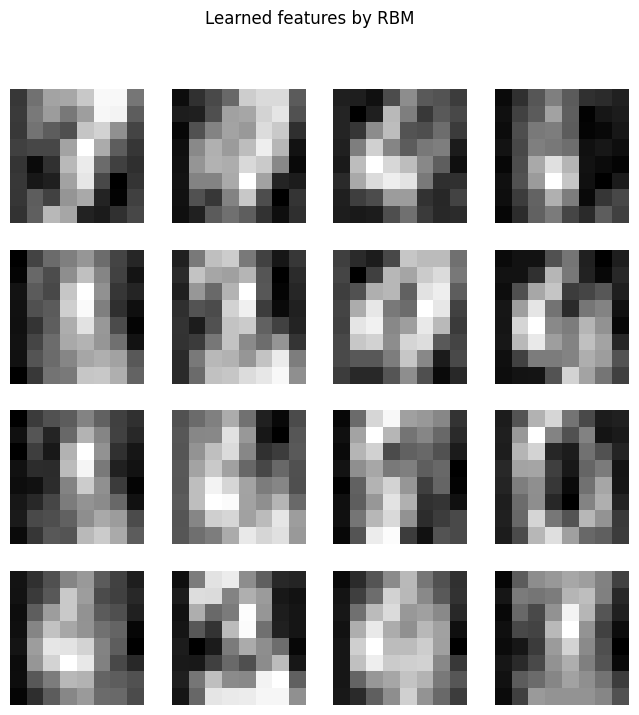

In [33]:
plt.figure(figsize=(8,8))
for i , comp in enumerate(rbm.components_[:16]):
    plt.subplot(4,4,i+1)
    plt.imshow(comp.reshape((8,8)),cmap='gray')
    plt.axis("off")

plt.suptitle("Learned features by RBM")
plt.show()
